Dataset Loaded Successfully
Shape: (14980, 15)
       AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4  eyeDetection  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85             0  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10             0  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23             0  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41             0  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46             0  

===== KNN MODEL & K TUNING =====
Best K Value: 1


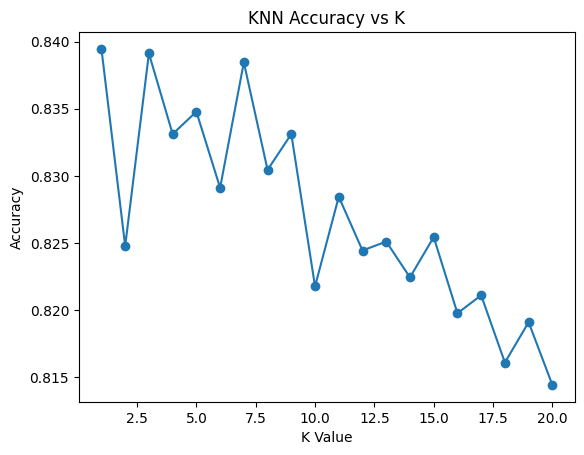

Final KNN Accuracy: 0.839452603471295


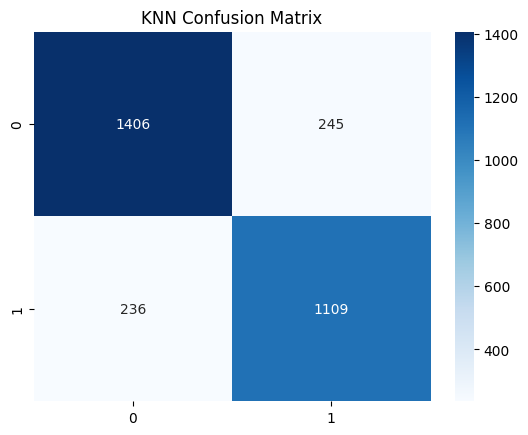


===== NEURAL NETWORK MODEL =====
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5717 - loss: 0.6721 - val_accuracy: 0.6216 - val_loss: 0.6410
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6296 - loss: 0.6314 - val_accuracy: 0.6300 - val_loss: 0.6134
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6591 - loss: 0.6077 - val_accuracy: 0.6617 - val_loss: 0.5883
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6854 - loss: 0.5762 - val_accuracy: 0.6913 - val_loss: 0.5646
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7094 - loss: 0.5561 - val_accuracy: 0.7055 - val_loss: 0.5453
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7238 - loss: 0.5374 - val_accuracy: 0.7292 - val_loss: 0.5266
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7304 - loss: 0.5273 - val_accuracy: 0.7393 - val_loss: 0.5106
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7600 - loss: 0.4994 - val_accuracy: 0.7605 - val_

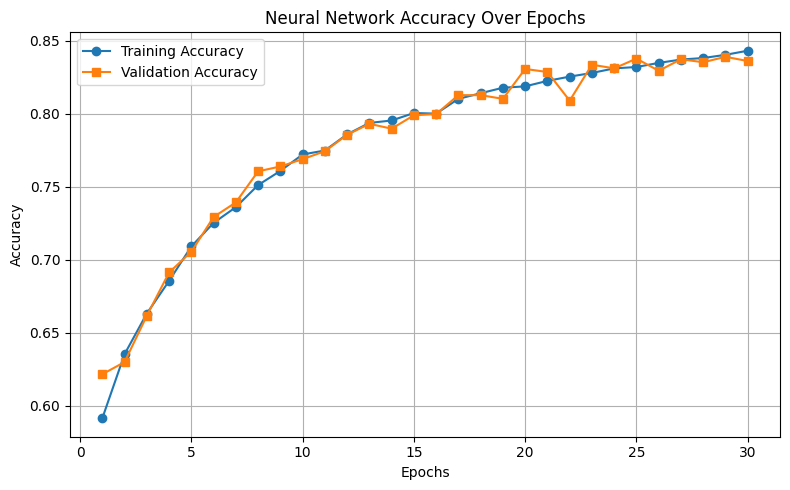

ANN Model Saved

===== PCA VISUALIZATION =====


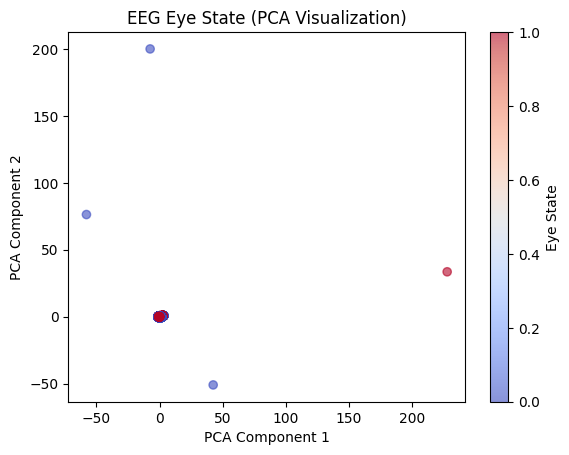


===== MODEL COMPARISON =====


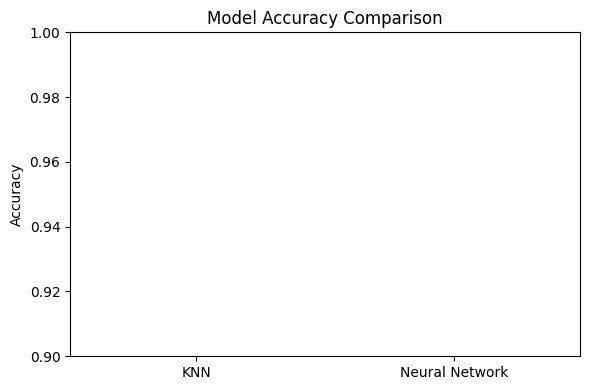


===== LIVE EEG SAMPLE PREDICTION =====
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step

Sample 1
KNN Prediction : Eyes Closed
ANN Prediction : Eyes Open
ANN Confidence : 42.46%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

Sample 2
KNN Prediction : Eyes Open
ANN Prediction : Eyes Open
ANN Confidence : 9.96%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Sample 3
KNN Prediction : Eyes Closed
ANN Prediction : Eyes Closed
ANN Confidence : 78.32%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

Sample 4
KNN Prediction : Eyes Closed
ANN Prediction : Eyes Closed
ANN Confidence : 91.47%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step

Sample 5
KNN Prediction : Eyes Open
ANN Prediction : Eyes Open
ANN Confidence : 0.04%

🎉 PROJECT EXECUTED SUCCESSFULLY 🎉


In [5]:
# ============================================================
# EEG EYE STATE CLASSIFICATION - ADVANCED PROJECT
# KNN + NEURAL NETWORK + PCA + TUNING + LIVE PREDICTION
# ============================================================

# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

# ------------------------------------------------------------
# 2. Load Dataset
# ------------------------------------------------------------
data = pd.read_csv("EEG_Eye_State.csv")

print("Dataset Loaded Successfully")
print("Shape:", data.shape)
print(data.head())

# ------------------------------------------------------------
# 3. Split Features & Target
# ------------------------------------------------------------
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# ------------------------------------------------------------
# 4. Feature Scaling
# ------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------------------------------
# 5. Train-Test Split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ============================================================
# 6. KNN MODEL + BEST K SELECTION
# ============================================================
print("\n===== KNN MODEL & K TUNING =====")

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    y_pred = knn_temp.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

best_k = k_values[accuracies.index(max(accuracies))]
print("Best K Value:", best_k)

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K")
plt.show()

# Train Final KNN
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("Final KNN Accuracy:", knn_accuracy)

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn),
            annot=True, fmt="d", cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.show()

# ============================================================
# 7. NEURAL NETWORK (ANN)
# ============================================================
print("\n===== NEURAL NETWORK MODEL =====")

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

loss, ann_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Neural Network Accuracy:", ann_accuracy)

# Accuracy Curve
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("ANN Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Save ANN Model
model.save("eeg_eye_state_ann_model.h5")
print("ANN Model Saved")

# ============================================================
# 8. PCA VISUALIZATION (EEG → 2D)
# ============================================================
print("\n===== PCA VISUALIZATION =====")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("EEG Eye State (PCA Visualization)")
plt.colorbar(label="Eye State")
plt.show()

# ===== MODEL COMPARISON (FIXED) =====
print("\n===== MODEL COMPARISON =====")

models = ['KNN', 'Neural Network']
scores = [knn_accuracy, ann_accuracy]

plt.figure(figsize=(6,4))
plt.bar(models, scores)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.9, 1.0)

# Force display
plt.tight_layout()
plt.show()
plt.close()


# ============================================================
# 10. LIVE PREDICTION + CONFIDENCE
# ============================================================
print("\n===== LIVE EEG SAMPLE PREDICTION =====")

for i in range(5):
    sample = X_test[i].reshape(1, -1)

    knn_pred = knn.predict(sample)[0]
    ann_prob = model.predict(sample)[0][0]
    ann_pred = 1 if ann_prob > 0.5 else 0

    print(f"\nSample {i+1}")
    print("KNN Prediction :", "Eyes Closed" if knn_pred else "Eyes Open")
    print("ANN Prediction :", "Eyes Closed" if ann_pred else "Eyes Open")
    print(f"ANN Confidence : {ann_prob*100:.2f}%")

    time.sleep(1)

print("\n🎉 PROJECT EXECUTED SUCCESSFULLY 🎉")
